# ReadData

In [26]:
import pandas as pd
import numpy as np

T2path = 'StataReg/0419-base/T2.csv'
T2 = pd.read_csv(T2path)
T3_Whole = T2[T2['Selected'] == 1]
T3path = 'StataReg/0419-base/Data.dta'
T3 = pd.read_stata(T3path)

In [29]:
len(T2['NotInHighMobility'] == 0)

1186

In [28]:
(T2['NotInHighMobility'] == 0).value_counts()

False    1174
True       12
Name: NotInHighMobility, dtype: int64

In [27]:
T2[T2['NotInHighMobility'] == 0]['Geographic Area Name'].to_list()

['Alameda, California',
 'Los Angeles, California',
 'San Francisco, California',
 'Santa Clara, California',
 'Hudson, New Jersey',
 'Bronx, New York',
 'Kings, New York',
 'New York, New York',
 'Queens, New York',
 'Richmond, New York',
 'Greenville, South Carolina',
 'Williamson, Texas']

In [24]:
T3_Whole[T3_Whole['NotInHighMobility'] == 0]['Geographic Area Name'].to_list()

['Alameda, California',
 'Los Angeles, California',
 'San Francisco, California',
 'Santa Clara, California',
 'Hudson, New Jersey',
 'Bronx, New York',
 'Kings, New York',
 'New York, New York',
 'Queens, New York',
 'Richmond, New York',
 'Greenville, South Carolina',
 'Williamson, Texas']

# MissingNo

<AxesSubplot:>

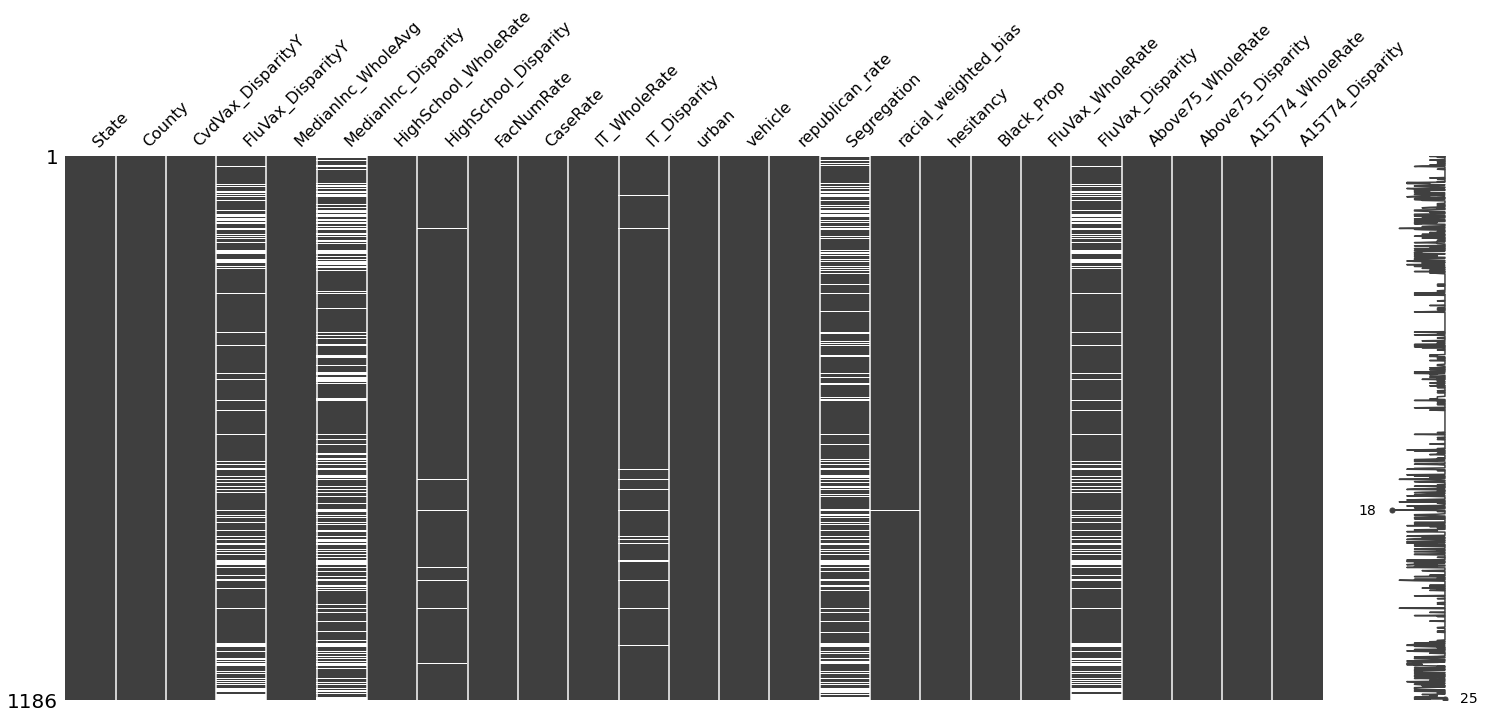

In [2]:
import missingno as misno

misno.matrix(T2[T3.columns[1:-5]])

# Correlation Matrix Heatmap

In [3]:
XY_cols = T3.columns[3:-5]
XY_cols

Index(['CvdVax_DisparityY', 'FluVax_DisparityY', 'MedianInc_WholeAvg',
       'MedianInc_Disparity', 'HighSchool_WholeRate', 'HighSchool_Disparity',
       'FacNumRate', 'CaseRate', 'IT_WholeRate', 'IT_Disparity', 'urban',
       'vehicle', 'republican_rate', 'Segregation', 'racial_weighted_bias',
       'hesitancy', 'Black_Prop', 'FluVax_WholeRate', 'FluVax_Disparity',
       'Above75_WholeRate', 'Above75_Disparity', 'A15T74_WholeRate',
       'A15T74_Disparity'],
      dtype='object')

In [4]:
newdf = T3[XY_cols]
newdf

,CvdVax_DisparityY,FluVax_DisparityY,MedianInc_WholeAvg,MedianInc_Disparity,HighSchool_WholeRate,HighSchool_Disparity,FacNumRate,CaseRate,IT_WholeRate,IT_Disparity,...,Segregation,racial_weighted_bias,hesitancy,Black_Prop,FluVax_WholeRate,FluVax_Disparity,Above75_WholeRate,Above75_Disparity,A15T74_WholeRate,A15T74_Disparity
0,16.768796,24.0,99.406,62.678,88.4,5.7,0.017292,5.114553,91.4,10.7,...,49.890444,33.258827,9.0,11.031221,47.0,24.0,5.863537,2.523464,77.100140,1.109113
1,13.494706,13.0,52.537,24.189,89.2,0.7,0.017793,5.288203,89.1,6.4,...,62.099507,36.520664,13.0,1.897019,40.0,13.0,7.511885,5.401255,75.659942,-0.084675
2,15.707145,13.0,59.401,39.137,71.3,18.7,0.018564,10.205597,86.5,-0.6,...,19.219010,37.223305,14.0,1.308767,46.0,13.0,6.367476,5.475884,71.225693,-2.698686
3,17.678572,27.0,99.716,44.922,89.5,4.9,0.014044,5.817034,93.8,6.2,...,52.702580,37.082206,9.0,9.541527,48.0,27.0,6.757628,5.090720,74.888299,-0.549194
4,23.012579,37.0,45.283,-57.687,80.1,21.5,0.028765,4.631094,84.0,-12.6,...,35.769303,36.879187,15.0,3.523659,36.0,37.0,7.201927,8.877480,75.273263,-16.931245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,20.113383,16.0,53.986,-0.735,93.7,15.1,0.041715,10.801854,83.3,-6.2,...,73.099649,36.775647,17.0,1.253766,49.0,16.0,7.703360,6.711699,76.111240,1.784838
752,23.430382,23.0,60.652,26.775,90.8,12.3,0.013661,14.317103,87.6,0.2,...,65.224838,35.934490,17.0,3.345894,54.0,23.0,7.948633,8.302437,76.294129,-15.252515
753,26.019744,28.0,73.893,42.958,95.8,8.4,0.016645,8.236402,91.4,9.0,...,49.608129,35.577848,14.0,5.531969,65.0,28.0,5.469412,5.010461,77.705119,5.934231
754,26.188287,24.0,62.340,40.201,92.1,12.5,0.018145,13.017971,89.8,6.1,...,58.983900,37.440183,17.0,2.976465,55.0,24.0,6.231525,6.670180,74.264200,6.713001


<AxesSubplot:>

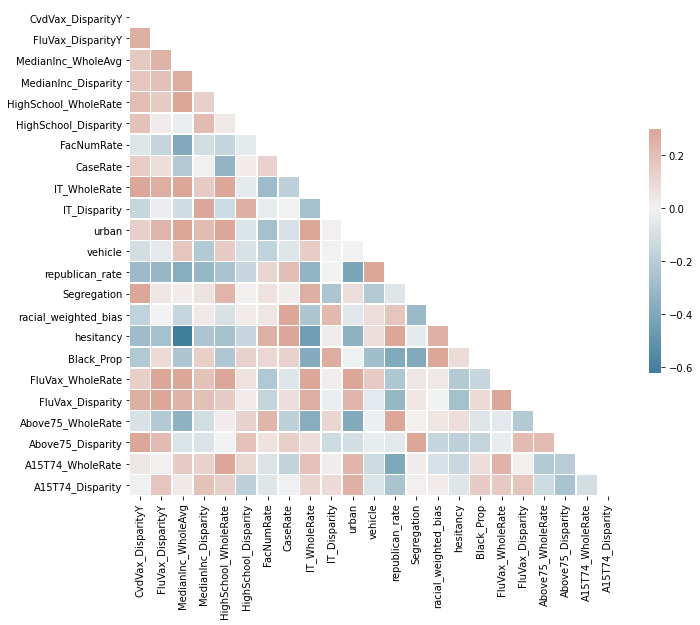

In [7]:

from matplotlib import pyplot as plt
import seaborn as sns


# Compute the correlation matrix
corr = newdf.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Republican Rate and CvdVax 

In [ ]:
T3_Whote.columns

In [ ]:
T3_Whole_repub = T3_Whote[]

Text(0.5, 1.0, 'Republican Rate and Black COVID-19 Vax Rate')

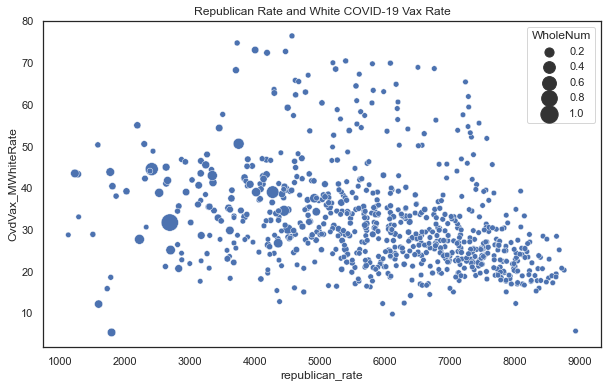

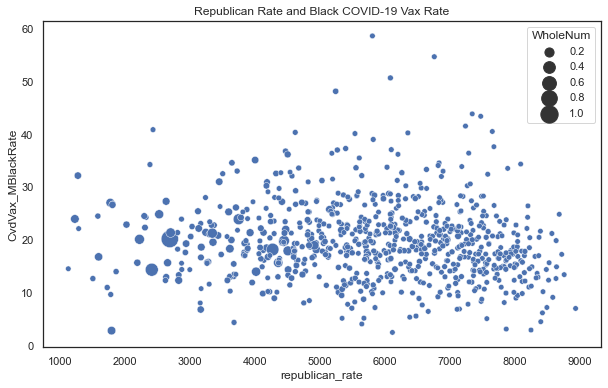

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="white")

dims = (10, 6)
# df = mylib.load_data()
fig, ax = plt.subplots(figsize=dims)


ax = sns.scatterplot(x='republican_rate', y='CvdVax_MWhiteRate', data = T3_Whole, size='WholeNum', sizes = (30, 300))
# ax = sns.regplot(x=OrgDF['republican_rate'], y=OrgDF['Vax_White'])

ax.set_title('Republican Rate and White COVID-19 Vax Rate')

fig, ax = plt.subplots(figsize=dims)
ax = sns.scatterplot(x='republican_rate', y='CvdVax_MBlackRate', data = T3_Whole, size='WholeNum', sizes = (30, 300))
# ax = sns.regplot(x=OrgDF['republican_rate'], y=OrgDF['Vax_Black'])
ax.set_title('Republican Rate and Black COVID-19 Vax Rate')


Text(0.5, 1.0, 'Republican Rate and Black Flu Vax Rate')

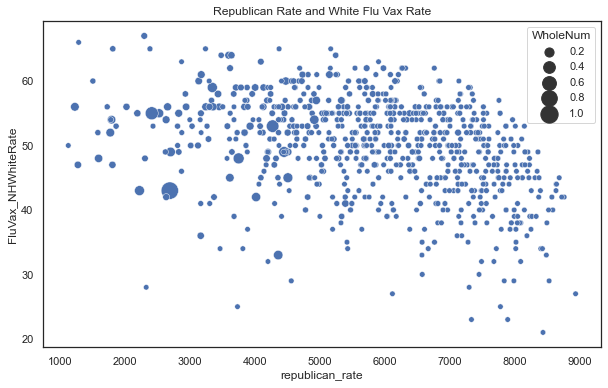

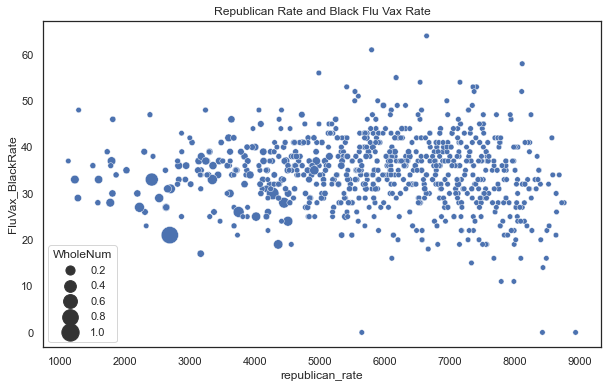

In [4]:


fig, ax = plt.subplots(figsize=dims)
ax = sns.scatterplot(x='republican_rate', y='FluVax_NHWhiteRate', data = T3_Whole, size='WholeNum', sizes = (30, 300))
# ax = sns.regplot(x=OrgDF['republican_rate'], y=OrgDF['FluVax_White'], )
ax.set_title('Republican Rate and White Flu Vax Rate')


fig, ax = plt.subplots(figsize=dims)
ax = sns.scatterplot(x='republican_rate', y='FluVax_BlackRate', data = T3_Whole, size='WholeNum', sizes = (30, 300))
# ax = sns.regplot(x=OrgDF['republican_rate'], y=OrgDF['FluVax_Black'])
ax.set_title('Republican Rate and Black Flu Vax Rate')
# ax = sns.regplot(x=OrgDF['Vax_Black'], y=OrgDF['republican_rate'], color="g")



# Covid Bar Chart (Weighted)

In [8]:
import pandas as pd

T2path = 'StataReg/0419-base/T2.csv'
T2 = pd.read_csv(T2path)
T3_Whole = T2[T2['Selected'] == 1].reset_index(drop = True)
T3path = 'StataReg/0419-base/Data.dta'
T3 = pd.read_stata(T3path)

print(T3_Whole.shape)

T3_Whole['Prop_Weights'] = T3_Whole['WholeNum'] / T3_Whole['WholeNum'].sum() * len(T3_Whole)
print(T3_Whole['Prop_Weights'].sum())

(756, 247)
756.0


In [9]:
import pandas as pd

RawData = T3_Whole
print(RawData.shape)

L = []

for idx, row in RawData.iterrows():
    d = row.to_dict()
    dn = {}
    dn['Vaccination'] = 'COVID-19'
    dn['Race'] = 'Black'
    dn['VaxRate'] = d['CvdVax_MBlackRate'] # * d['Prop_Weights']
    dn['Prop_Weights'] = d['Prop_Weights']
    dn['Republican'] = d['republican']
    dn['Vaccination Rate (%)'] = d['CvdVax_MBlackRate'] * d['Prop_Weights']
    L.append(dn)
                    
                    
    dn = {}
    dn['Vaccination'] = 'COVID-19'
    dn['Race'] = 'White'
    dn['VaxRate'] = d['CvdVax_MWhiteRate'] # * d['Prop_Weights']
    dn['Prop_Weights'] = d['Prop_Weights']
    dn['Republican'] = d['republican']
    dn['Vaccination Rate (%)'] = d['CvdVax_MWhiteRate']* d['Prop_Weights']
    L.append(dn)
                    
    
newdf = pd.DataFrame(L)
# print(newdf.shape)
newdf

(756, 248)


,Vaccination,Race,VaxRate,Prop_Weights,Republican,Vaccination Rate (%)
0,COVID-19,Black,27.087876,7.404302,0,200.566807
1,COVID-19,White,43.856672,7.404302,0,324.728032
2,COVID-19,Black,14.117169,0.971035,0,13.708268
3,COVID-19,White,27.611875,0.971035,0,26.812103
4,COVID-19,Black,11.702987,0.095457,0,1.117135
...,...,...,...,...,...,...
1507,COVID-19,White,50.577493,2.421962,0,122.496749
1508,COVID-19,Black,14.808230,1.171971,0,17.354813
1509,COVID-19,White,40.996517,1.171971,0,48.046721
1510,COVID-19,Black,15.471167,0.200439,0,3.101032


In [3]:
import numpy as np
df = newdf[newdf['Race'] == 'Black']
values = df['VaxRate']
weights= df['Prop_Weights']
average = np.ma.average(values, weights = weights, axis=0)
variance = np.dot(weights, (values - average) ** 2) / weights.sum()
std = np.sqrt(variance)
print(average,std)


black_w_average = average

import numpy as np
df = newdf[newdf['Race'] == 'White']
values = df['VaxRate']
weights= df['Prop_Weights']
average = np.ma.average(values, weights = weights, axis=0)
variance = np.dot(weights, (values - average) ** 2) / weights.sum()
std = np.sqrt(variance)
print(average,std)

white_w_average = average

print(white_w_average - black_w_average)

19.9025283725099 6.114019352435313
35.944926342136085 11.061767478027443
16.042397969626187


In [12]:
newdf

,Vaccination,Race,VaxRate,Prop_Weights,Republican,Vaccination Rate (%)
0,COVID-19,Black,27.087876,7.404302,0,200.566807
1,COVID-19,White,43.856672,7.404302,0,324.728032
2,COVID-19,Black,14.117169,0.971035,0,13.708268
3,COVID-19,White,27.611875,0.971035,0,26.812103
4,COVID-19,Black,11.702987,0.095457,0,1.117135
...,...,...,...,...,...,...
1507,COVID-19,White,50.577493,2.421962,0,122.496749
1508,COVID-19,Black,14.808230,1.171971,0,17.354813
1509,COVID-19,White,40.996517,1.171971,0,48.046721
1510,COVID-19,Black,15.471167,0.200439,0,3.101032


In [20]:
import numpy as np


print('Republican')
df = newdf[newdf['Race'] == 'Black']
df = df[df['Republican'] == 1]
values = df['VaxRate']
weights= df['Prop_Weights']
average = np.ma.average(values, weights = weights, axis=0)
variance = np.dot(weights, (values - average) ** 2) / weights.sum()
std = np.sqrt(variance)
print('Black (w-mean, w-std):', average, std)


black_w_average = average

import numpy as np
df = newdf[newdf['Race'] == 'White']
df = df[df['Republican'] == 1]
values = df['VaxRate']
weights= df['Prop_Weights']
average = np.ma.average(values, weights = weights, axis=0)
variance = np.dot(weights, (values - average) ** 2) / weights.sum()
std = np.sqrt(variance)
print('White (w-mean, w-std):', average,std)

white_w_average = average

print('Diff:', white_w_average - black_w_average)

Republican
Black (w-mean, w-std): 20.845182998638897 6.229053728672513
White (w-mean, w-std): 35.18775357854754 9.990283341184034
Diff: 14.342570579908646


In [21]:
import numpy as np

print('Democrat')
df = newdf[newdf['Race'] == 'Black']
df = df[df['Republican'] == 0]
values = df['VaxRate']
weights= df['Prop_Weights']
average = np.ma.average(values, weights = weights, axis=0)
variance = np.dot(weights, (values - average) ** 2) / weights.sum()
std = np.sqrt(variance)
print('Black (w-mean, w-std):', average, std)


black_w_average = average

import numpy as np
df = newdf[newdf['Race'] == 'White']
df = df[df['Republican'] == 0]
values = df['VaxRate']
weights= df['Prop_Weights']
average = np.ma.average(values, weights = weights, axis=0)
variance = np.dot(weights, (values - average) ** 2) / weights.sum()
std = np.sqrt(variance)
print('White (w-mean, w-std):', average,std)

white_w_average = average

print('Diff:', white_w_average - black_w_average)

Democrat
Black (w-mean, w-std): 19.34130076982447 5.974266553937727
White (w-mean, w-std): 36.3957237425292 11.629611261003427
Diff: 17.054422972704728


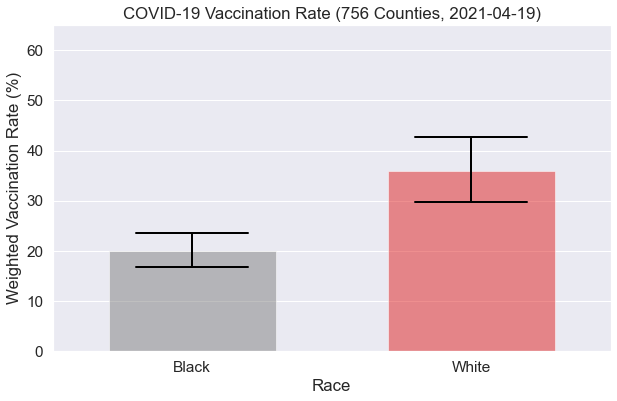

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns.set_theme(style="ticks")
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.4)


def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

            
dims = (10, 6)
fig, ax = plt.subplots(figsize=dims)
ax.set(ylim=(0, 65))


ax = sns.barplot(x="Race" , y="Vaccination Rate (%)", #estimator=sum, 
                 palette = ['grey', 'red'], alpha = 0.5,
                 data=newdf, errwidth = 2, errcolor = 'black', capsize=.4)


change_width(ax, 0.6)



county_num = len(RawData)
date = '2021-04-19'



ax.set_ylabel("Weighted Vaccination Rate (%)")
ax.set_title('COVID-19 Vaccination Rate ({} Counties, {})'.format(county_num, date))


plt.show()


In [5]:

print('April 19')
Rate = RawData[[ 'CvdVax_Disparity', 'CvdVax_MBlackRate', 'CvdVax_MWhiteRate',]].describe()
Rate.to_clipboard()
Rate

April 19


,CvdVax_Disparity,CvdVax_MBlackRate,CvdVax_MWhiteRate
count,756.000000,756.000000,756.000000
mean,12.118775,19.712736,31.831511
std,10.354706,7.268635,11.929706
min,-18.168016,2.480271,5.379974
25%,4.921826,14.952055,23.605326
50%,10.451356,19.077462,29.041354
75%,17.756555,23.417363,37.541453
max,53.842225,58.707865,76.501062


# Covid Bar Chart (Original)

In [8]:
newdf

,Vaccination,Race,VaxRate,Prop_Weights,Vaccination Rate (%)
0,COVID-19,Black,27.087876,7.404302,200.566807
1,COVID-19,White,43.856672,7.404302,324.728032
2,COVID-19,Black,14.117169,0.971035,13.708268
3,COVID-19,White,27.611875,0.971035,26.812103
4,COVID-19,Black,11.702987,0.095457,1.117135
...,...,...,...,...,...
1507,COVID-19,White,50.577493,2.421962,122.496749
1508,COVID-19,Black,14.808230,1.171971,17.354813
1509,COVID-19,White,40.996517,1.171971,48.046721
1510,COVID-19,Black,15.471167,0.200439,3.101032


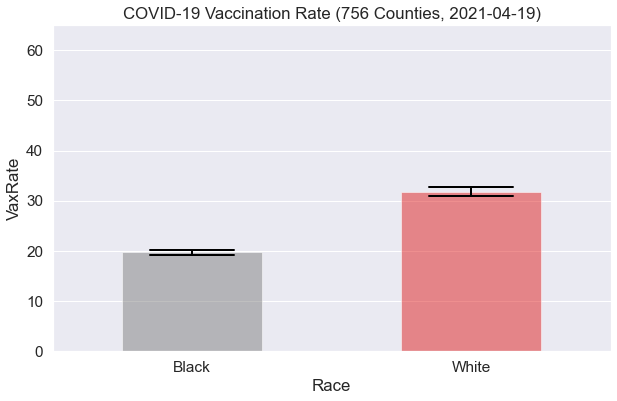

In [10]:
from matplotlib import pyplot as plt
import seaborn


def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

            
# import mylib


time = '2021-04-19'
dims = (10, 6)
# df = mylib.load_data()
fig, ax = plt.subplots(figsize=dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)
ax.set(ylim=(0, 65))



# df.to_csv('759_rate.csv')
ax = sns.barplot(x="Race" , y="VaxRate", palette = ['grey', 'red'], alpha = 0.5,
                 data=newdf, errwidth = 2, errcolor = 'black', capsize=.3)

change_width(ax, 0.5)

ax.set_title('COVID-19 Vaccination Rate ({} Counties, {})'.format(county_num, time))


plt.show()


# Covid Distribution

(756, 248)


/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 0.155)]

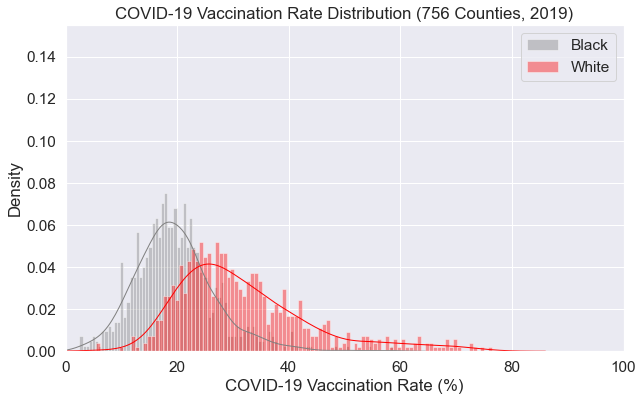

In [21]:
import pandas as pd
from matplotlib import pyplot#  as plt
 
    
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.4)

RawData = T3_Whole
print(RawData.shape)


dims = (10, 6)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=dims)

ax = sns.distplot(RawData['CvdVax_MBlackRate'], hist=True, kde=True, 
            bins=int(100), color = 'grey',
            kde_kws={'linewidth': 1}, label='Black')

ax = sns.distplot(RawData['CvdVax_MWhiteRate'], hist=True, kde=True,
            bins=int(100), color = 'red',
            kde_kws={'linewidth': 1}, label='White')

pyplot.legend(loc='best')
counties_num = len(RawData)
ax.set_title('COVID-19 Vaccination Rate Distribution ({} Counties, {})'.format(county_num, date))
ax.set(xlabel='COVID-19 Vaccination Rate (%)')
ax.set(ylabel ='Density')
ax.set(xlim=(0, 100))
ax.set(ylim=(0, 0.155))

# Flu Bar Chart (Weighted)

In [11]:
import pandas as pd

T2path = 'StataReg/0419-base/T2.csv'
T2 = pd.read_csv(T2path)
T3_Whole = T2[T2['Selected'] == 1].reset_index(drop = True)
T3path = 'StataReg/0419-base/Data.dta'
T3 = pd.read_stata(T3path)

print(T3_Whole.shape)

T3_Whole['Prop_Weights'] = T3_Whole['WholeNum'] / T3_Whole['WholeNum'].sum() * len(T3_Whole)
print(T3_Whole['Prop_Weights'].sum())

(756, 247)
756.0


In [12]:
import pandas as pd

RawData = T3_Whole
print(RawData.shape)

L = []

for idx, row in RawData.iterrows():
    d = row.to_dict()
    dn = {}
    
    dn = {}
    dn['Vaccination'] = 'Flu'
    dn['Race'] = 'Black'
    
    dn['VaxRate'] = d['FluVax_BlackRate'] # * d['Prop_Weights']
    dn['Prop_Weights'] = d['Prop_Weights']
    
    
    dn['Vaccination Rate (%)'] = d['FluVax_BlackRate']* d['Prop_Weights']
    # dn['Population'] = d['Total_Whole']
    # dn['Rate-Population'] = (dn['Vaccination Rate (%)'] , dn['Population'])
    L.append(dn)
    
    dn = {}
    dn['Vaccination'] = 'Flu'
    dn['Race'] = 'White'
    
    dn['VaxRate'] = d['FluVax_NHWhiteRate'] # * d['Prop_Weights']
    dn['Prop_Weights'] = d['Prop_Weights']
    
    
    
    dn['Vaccination Rate (%)'] = d['FluVax_NHWhiteRate']* d['Prop_Weights']
    L.append(dn)
    
newdf = pd.DataFrame(L)
# print(newdf.shape)
newdf

(756, 248)


,Vaccination,Race,VaxRate,Prop_Weights,Vaccination Rate (%)
0,Flu,Black,28.0,7.404302,207.320449
1,Flu,White,52.0,7.404302,385.023691
2,Flu,Black,27.0,0.971035,26.217950
3,Flu,White,40.0,0.971035,38.841408
4,Flu,Black,33.0,0.095457,3.150090
...,...,...,...,...,...
1507,Flu,White,67.0,2.421962,162.271431
1508,Flu,Black,32.0,1.171971,37.503066
1509,Flu,White,56.0,1.171971,65.630365
1510,Flu,Black,42.0,0.200439,8.418456


In [13]:
import numpy as np
df = newdf[newdf['Race'] == 'Black']
values = df['VaxRate']
weights= df['Prop_Weights']
average = np.ma.average(values, weights = weights, axis=0)
variance = np.dot(weights, (values - average) ** 2) / weights.sum()
std = np.sqrt(variance)
print(average,std)


black_w_average = average

import numpy as np
df = newdf[newdf['Race'] == 'White']
values = df['VaxRate']
weights= df['Prop_Weights']
average = np.ma.average(values, weights = weights, axis=0)
variance = np.dot(weights, (values - average) ** 2) / weights.sum()
std = np.sqrt(variance)
print(average,std)

white_w_average = average

print(white_w_average - black_w_average)

32.83652202954368 6.482277659993485
51.6344817802774 6.5205127913536325
18.797959750733717


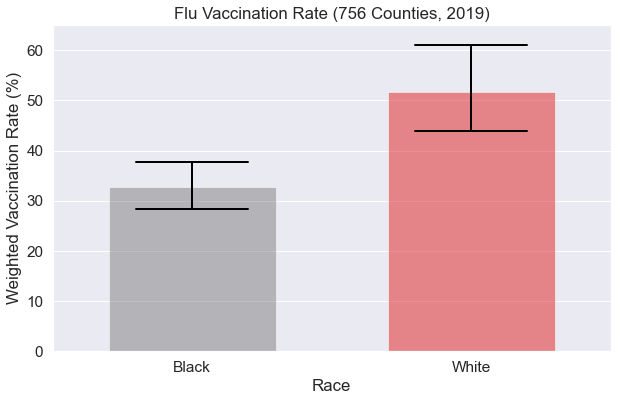

April 19


,FluVax_Disparity,FluVax_BlackRate,FluVax_NHWhiteRate
count,756.000000,756.000000,756.000000
mean,15.185185,34.486772,49.671958
std,6.444678,7.720178,7.516044
min,-12.000000,0.000000,21.000000
25%,12.000000,30.000000,45.000000
50%,16.000000,35.000000,50.000000
75%,19.000000,39.000000,55.000000
max,37.000000,64.000000,67.000000


In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns.set_theme(style="ticks")
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.4)



def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

            
# import mylib
newdf = newdf[newdf['Vaccination'] == 'Flu']


dims = (10, 6)
# df = mylib.load_data()
fig, ax = plt.subplots(figsize=dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)
ax.set(ylim=(0, 65))


if True:
    
    # df.to_csv('759_rate.csv')
    ax = sns.barplot(x="Race" , y="Vaccination Rate (%)", palette = ['grey', 'red'], # ci = 'sd',
                     alpha = 0.5, # estimator = sum,
                     data=newdf, errwidth = 2, errcolor = 'black', capsize=.4)
    
    change_width(ax, 0.6)
    
else:
    ax = sns.barplot(x="Vaccination" , y="Vaccination Rate (%)", hue = 'Race', palette = ['grey', 'red'], alpha = 0.5,
                 data=newdf, errwidth = 2, errcolor = 'black', capsize=.4)


# ax.set_ylabel("Weighted Vaccination Rate (%)")
# ax.set_title('Flu Vaccination Rate (759 Counties, 2019)')

county_num = len(RawData)
date = '2019'

ax.set_ylabel("Weighted Vaccination Rate (%)")
ax.set_title('Flu Vaccination Rate ({} Counties, {})'.format(county_num, date))

plt.show()

print('April 19')
Rate = RawData[[ 'FluVax_Disparity', 'FluVax_BlackRate', 'FluVax_NHWhiteRate',]].describe()
Rate.to_clipboard()
Rate

# Flu Bar Chart (Original)

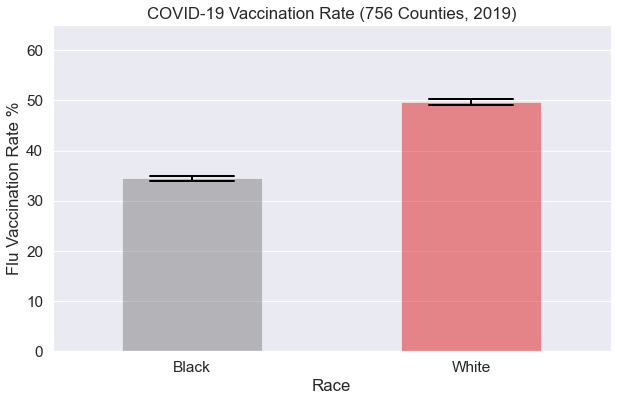

In [19]:
from matplotlib import pyplot as plt
import seaborn


def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

            
# import mylib


time = '2019'
dims = (10, 6)
# df = mylib.load_data()
fig, ax = plt.subplots(figsize=dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)
ax.set(ylim=(0, 65))



# df.to_csv('759_rate.csv')
ax = sns.barplot(x="Race" , y="VaxRate", palette = ['grey', 'red'], alpha = 0.5,
                 data=newdf, errwidth = 2, errcolor = 'black', capsize=.3)

change_width(ax, 0.5)

ax.set_title('COVID-19 Vaccination Rate ({} Counties, {})'.format(county_num, time))
ax.set_ylabel('Flu Vaccination Rate %')

plt.show()


# Flu Distribution

(756, 248)


/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 0.155)]

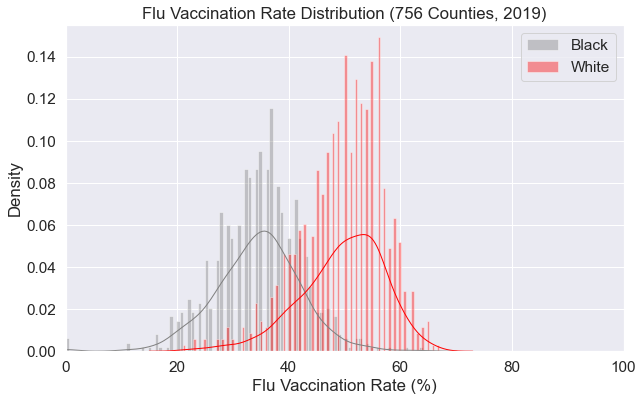

In [17]:
import pandas as pd
from matplotlib import pyplot#  as plt
 
    
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.4)

# Rate = T2[['Rate_Diff', 'Rate_Black', 'Rate_White',  'FluDiff', 'FluBlack', 'FluWhite',]].mean()*100
# Rate

RawData = T3_Whole
print(RawData.shape)


dims = (10, 6)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=dims)

ax = sns.distplot(RawData['FluVax_BlackRate'], hist=True, kde=True, 
            bins=int(100), color = 'grey',
            kde_kws={'linewidth': 1}, label='Black')

ax = sns.distplot(RawData['FluVax_NHWhiteRate'], hist=True, kde=True,
            bins=int(100), color = 'red',
            kde_kws={'linewidth': 1}, label='White')

pyplot.legend(loc='best')


county_num = len(RawData)
date = '2019'

ax.set_title('Flu Vaccination Rate Distribution ({} Counties, {})'.format(county_num, date))
ax.set(xlabel='Flu Vaccination Rate (%)')
ax.set(ylabel ='Density')
ax.set(xlim=(0, 100))
ax.set(ylim=(0, 0.155))